1. Analyzing f(x) = x^4 - 2x^2
Exploring different initial points to find local minima:

Starting Gradient Descent at x0 = 1
Stopped: Minimal change at iteration 2


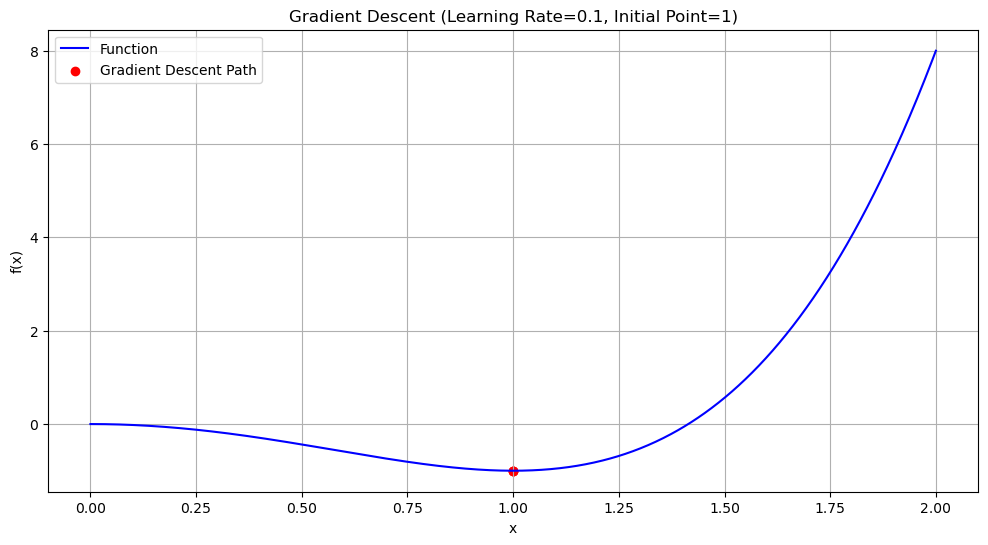

Optimization Result: (0.999995, -1.0)

Starting Gradient Descent at x0 = -1
Stopped: Minimal change at iteration 2


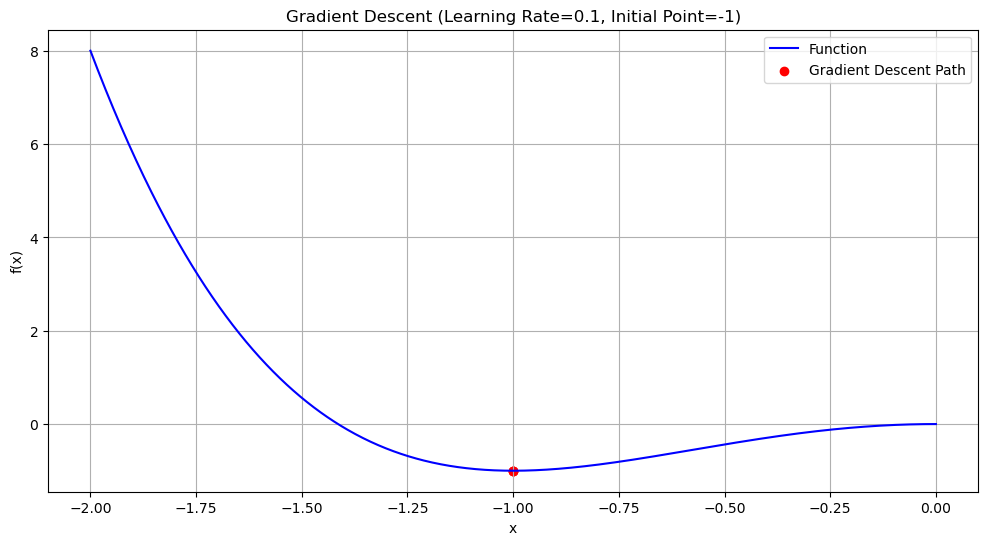

Optimization Result: (-1.000005, -1.0)

Starting Gradient Descent at x0 = 0
Stopped: Minimal change at iteration 46


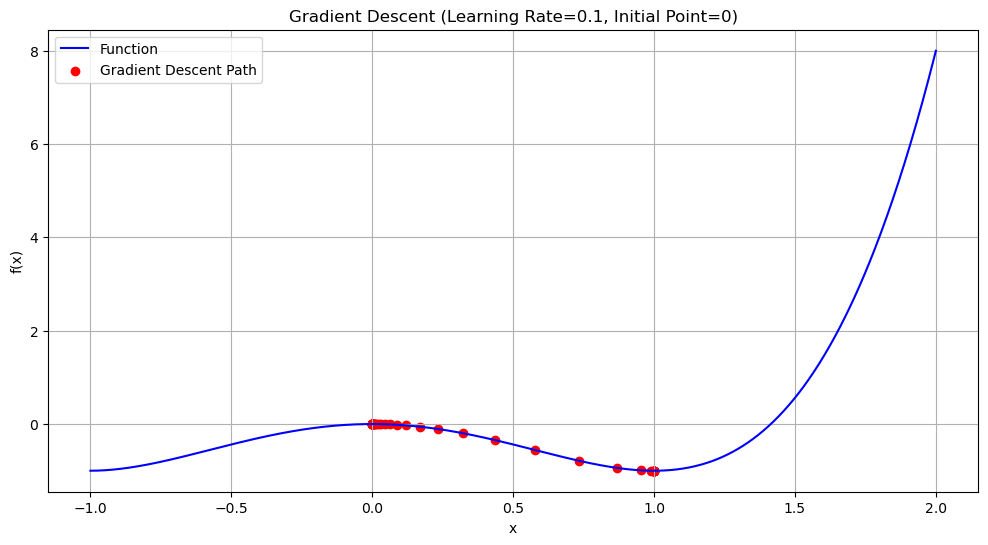

Optimization Result: (0.999995, -1.0)

Theoretical Insights:
Function: f(x) = x^4 - 2x^2 = x^2(x^2 - 2)
Theoretical Critical Points: x = 0, ±√2

2. Analyzing Challenging Functions:

Funny Function Function:
Stopped: Minimal change at iteration 422


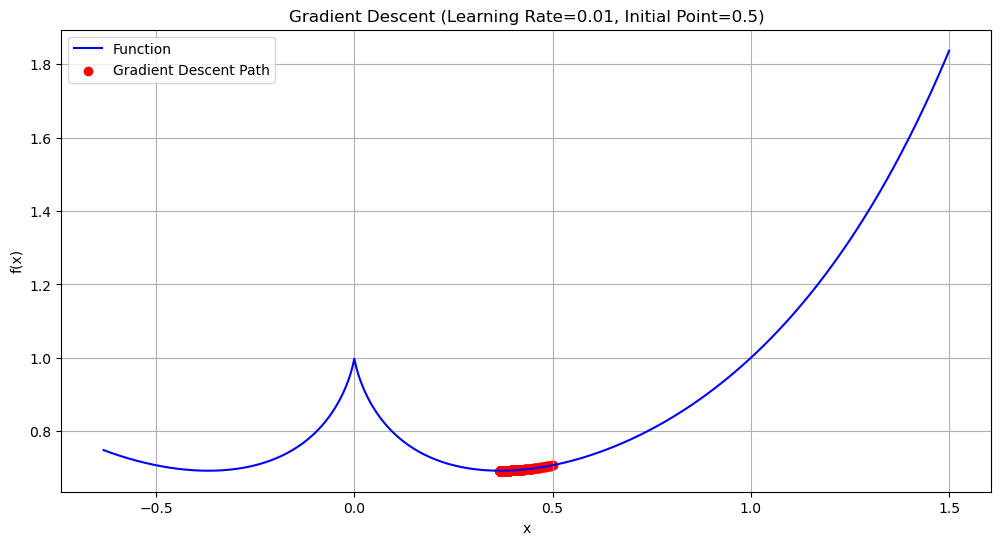

Result: (0.367926, 0.692201)

Absolute Value Function:


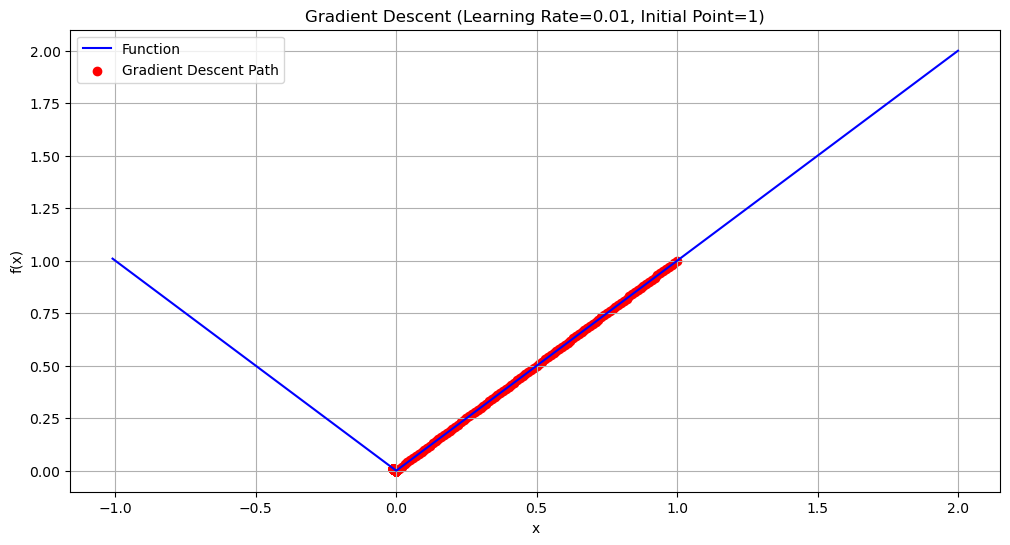

Result: (-0.01, 0.01)

X Sixth Function:


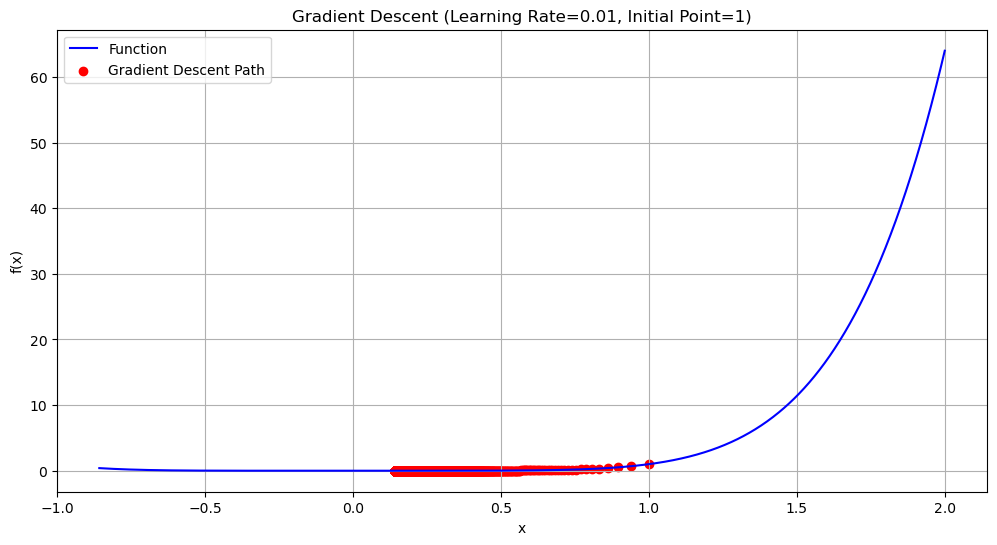

Result: (0.142838, 8e-06)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(f, learning_rate, initial, max_iterations=10000, convergence_threshold=1e-6):
    """
    Implement gradient descent to find the local minimum of a function.
    
    Parameters:
    - f: The objective function to minimize
    - learning_rate: Step size for each iteration (controls convergence speed)
    - initial: Starting point for the optimization
    - max_iterations: Prevent infinite loops
    - convergence_threshold: Stopping criterion for derivative and point change
    
    Returns:
    - Tuple of (final x-coordinate, final function value)
    """
    def deriv(f, base):
        """
        Numerically estimate the derivative of function f at a point.
        
        Uses finite difference method (forward difference approximation):
        f'(x) ≈ [f(x + h) - f(x)] / h
        
        Parameters:
        - f: Function to differentiate
        - base: Point at which to calculate derivative
        
        Returns:
        - Approximated derivative value
        """
        h = 1e-5  # Small step size for numerical differentiation
        return (f(base + h) - f(base)) / h

    # Initialize lists to track optimization path
    x_cord = [initial]    # Store x-coordinates of each iteration
    y_cord = [f(initial)]  # Store corresponding function values

    # Gradient descent iteration
    for i in range(1, max_iterations):
        # Get current point and its derivative
        current_x = x_cord[i-1]
        derivative = deriv(f, current_x)

        # Stopping condition 1: Derivative is very close to zero
        # This indicates we're near a local minimum
        if abs(derivative) < convergence_threshold:
            print(f"Stopped: Derivative near zero at iteration {i}")
            break

        # Calculate next point by moving opposite to gradient
        # Formula: x_next = x_current - learning_rate * derivative
        # Negative sign because we're minimizing (moving downhill)
        next_x = current_x - learning_rate * derivative
        
        # Store new point and its function value
        x_cord.append(next_x)
        y_cord.append(f(next_x))

        # Stopping condition 2: Minimal change between iterations
        # Prevents unnecessary computations when very close to minimum
        if len(x_cord) > 1 and abs(x_cord[-1] - x_cord[-2]) < convergence_threshold:
            print(f"Stopped: Minimal change at iteration {i}")
            break

    # Visualization of optimization process
    plt.figure(figsize=(12, 6))
    
    # Create smooth plot of entire function
    # Add buffer to plot range to show context around optimization path
    plot_range = np.linspace(min(x_cord) - 1, max(x_cord) + 1, 1000)
    function_range = [f(x) for x in plot_range]
    
    # Plot the full function curve
    plt.plot(plot_range, function_range, label='Function', color='blue')
    
    # Plot the optimization path
    plt.scatter(x_cord, y_cord, color='red', label='Gradient Descent Path')
    
    # Annotate plot with optimization details
    plt.title(f'Gradient Descent (Learning Rate={learning_rate}, Initial Point={initial})')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return final point rounded to 6 decimal places
    return round(x_cord[-1], 6), round(y_cord[-1], 6)

# Test Functions with Unique Characteristics
def x_fourth_minus_two_x_squared(x):
    """
    Polynomial function with multiple local minima.
    f(x) = x^4 - 2x^2
    Has critical points at x = 0, ±√2
    """
    return x**4 - 2*x**2

def funny_function(x):
    """
    Asymmetric function with challenging optimization landscape.
    Defined piecewise to handle positive, zero, and negative inputs.
    """
    if x > 0:
        return x**x  # Grows super-exponentially for x > 0
    elif x == 0:
        return 1    # Special case at origin
    else:
        return abs(x)**abs(x)  # Symmetric behavior for negative x

def absolute_value(x):
    """
    Absolute value function - problematic for gradient descent.
    Non-differentiable at x = 0
    Constant gradient of ±1 elsewhere
    """
    return abs(x)

def x_sixth(x):
    """
    Extremely steep function near zero.
    Demonstrates challenges with very flat gradients.
    """
    return x**6

def analyze_functions():
    """
    Comprehensive analysis of gradient descent across different functions.
    Demonstrates how initial conditions and function characteristics 
    impact optimization.
    """
    # 1. Polynomial Function Analysis
    print("1. Analyzing f(x) = x^4 - 2x^2")
    print("Exploring different initial points to find local minima:")
    
    # Test multiple initial points
    initial_points = [1, -1, 0]
    for x0 in initial_points:
        print(f"\nStarting Gradient Descent at x0 = {x0}")
        result = gradient_descent(
            x_fourth_minus_two_x_squared, 
            learning_rate=0.1, 
            initial=x0
        )
        print(f"Optimization Result: {result}")
    
    # Theoretical context
    print("\nTheoretical Insights:")
    print("Function: f(x) = x^4 - 2x^2 = x^2(x^2 - 2)")
    print("Theoretical Critical Points: x = 0, ±√2")
    
    # 2. Challenging Function Analysis
    print("\n2. Analyzing Challenging Functions:")
    
    # Attempt optimization on different challenging functions
    test_functions = [
        ("Funny Function", funny_function, 0.5),
        ("Absolute Value", absolute_value, 1),
        ("X Sixth", x_sixth, 1)
    ]
    
    for name, func, initial in test_functions:
        print(f"\n{name} Function:")
        try:
            result = gradient_descent(func, learning_rate=0.01, initial=initial)
            print(f"Result: {result}")
        except Exception as e:
            print(f"Optimization Failed: {e}")

# Execute the comprehensive analysis
analyze_functions()


 Exploring f(x) = x²
Step 1:
  Current Point: x = 1.0000
  Function Value: f(x) = 1.0000
  Derivative: f'(x) = 2.0000
  Next Point: x = -0.6000
  Change: 1.6000e+00

Step 2:
  Current Point: x = -0.6000
  Function Value: f(x) = 0.3600
  Derivative: f'(x) = -1.2000
  Next Point: x = 0.3600
  Change: 9.6000e-01

Step 3:
  Current Point: x = 0.3600
  Function Value: f(x) = 0.1296
  Derivative: f'(x) = 0.7200
  Next Point: x = -0.2160
  Change: 5.7600e-01

Step 4:
  Current Point: x = -0.2160
  Function Value: f(x) = 0.0467
  Derivative: f'(x) = -0.4320
  Next Point: x = 0.1296
  Change: 3.4560e-01

Step 5:
  Current Point: x = 0.1296
  Function Value: f(x) = 0.0168
  Derivative: f'(x) = 0.2592
  Next Point: x = -0.0778
  Change: 2.0736e-01

Step 6:
  Current Point: x = -0.0778
  Function Value: f(x) = 0.0060
  Derivative: f'(x) = -0.1555
  Next Point: x = 0.0467
  Change: 1.2442e-01

Step 7:
  Current Point: x = 0.0467
  Function Value: f(x) = 0.0022
  Derivative: f'(x) = 0.0933
  Next P

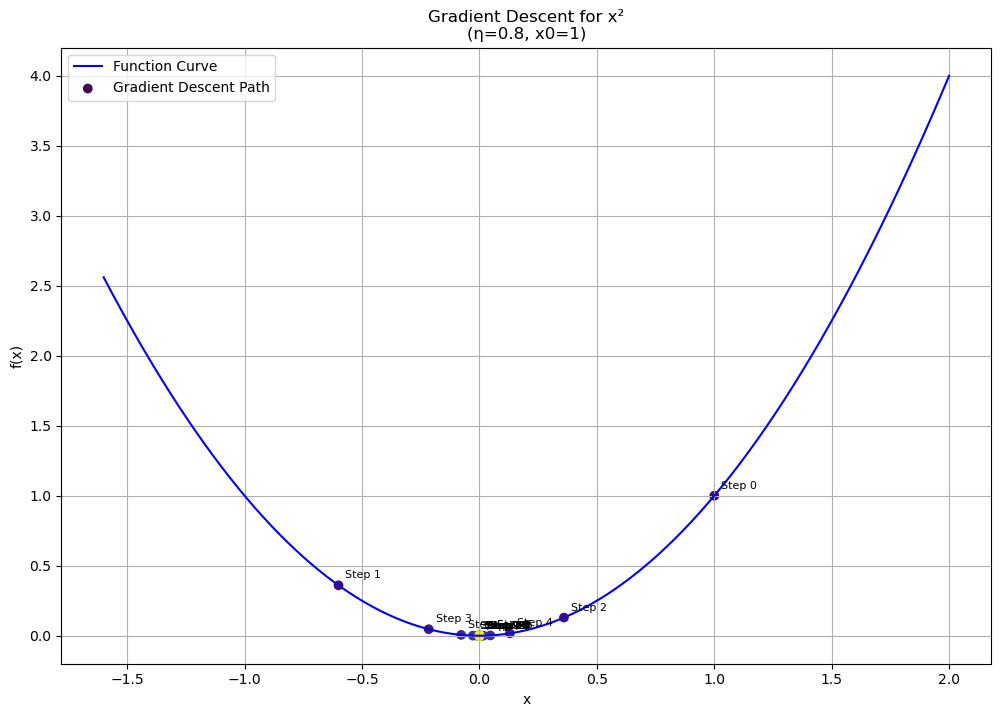

 Gradient Descent Results:
  Final Point: x = -0.0000
  Final Function Value: f(x) = 0.0000
  Total Steps: 48

 Exploring f(x) = x⁴ - 2x²
🏁 Convergence reached! Derivative is nearly zero.


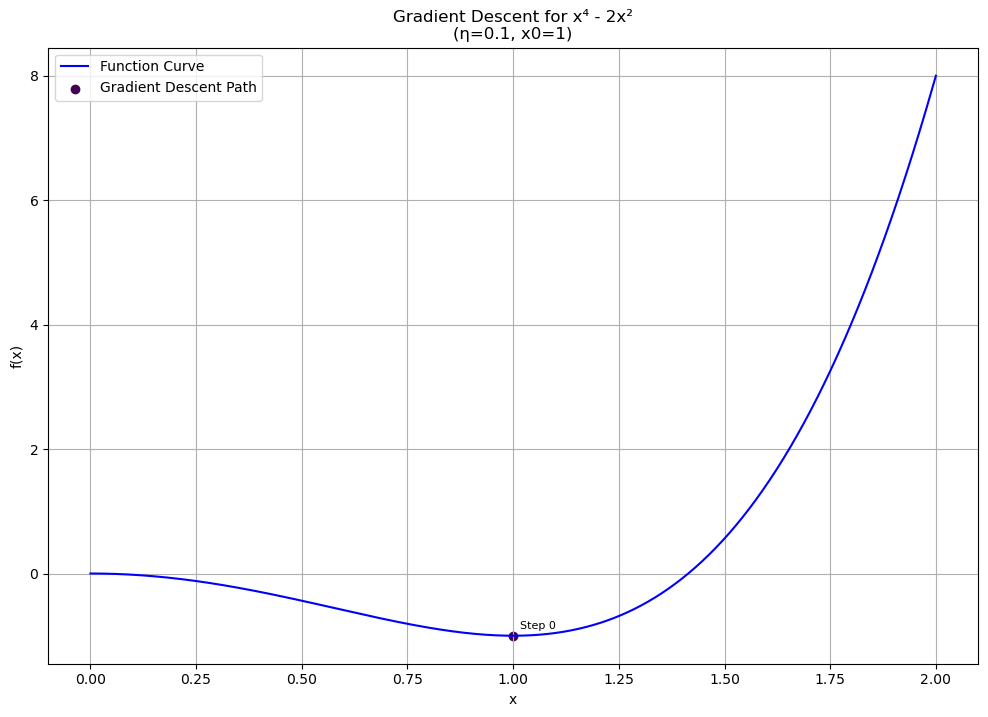

 Gradient Descent Results:
  Final Point: x = 1.0000
  Final Function Value: f(x) = -1.0000
  Total Steps: 1


(1, -1)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def gradient_descent_explained(f, learning_rate, initial_point, 
                                convergence_threshold=1e-10, 
                                max_iterations=10000,
                                function_name="Unknown Function"):
    def deriv(f, base_point):
        # Symmetric derivative approximation
        h = 1e-10
        return (f(base_point + h) - f(base_point - h)) / (2 * h)
    
    # Initialize lists to track points and function values
    x_coords = [initial_point]
    y_coords = [f(initial_point)]
    derivative_history = [deriv(f, initial_point)]
    
    # Detailed step-by-step gradient descent
    for step in range(max_iterations):
        current_point = x_coords[-1]
        derivative = deriv(f, current_point)
        
        # Stop conditions
        if abs(derivative) < convergence_threshold:
            print(f"🏁 Convergence reached! Derivative is nearly zero.")
            break
        
        # Calculate next point by moving opposite to gradient
        next_point = current_point - learning_rate * derivative
        
        # Store results
        x_coords.append(next_point)
        y_coords.append(f(next_point))
        derivative_history.append(derivative)
        
        # Optional early stopping
        if len(x_coords) > 1 and abs(x_coords[-1] - x_coords[-2]) < convergence_threshold:
            print(f" Minimal change detected between iterations.")
            break
        
        # Print detailed step information
        print(f"Step {step+1}:")
        print(f"  Current Point: x = {current_point:.4f}")
        print(f"  Function Value: f(x) = {f(current_point):.4f}")
        print(f"  Derivative: f'(x) = {derivative:.4f}")
        print(f"  Next Point: x = {next_point:.4f}")
        print(f"  Change: {abs(next_point - current_point):.4e}\n")
    
    # Comprehensive visualization
    plt.figure(figsize=(12, 8))
    
    # Plot the function curve
    plot_range = np.linspace(min(x_coords) - 1, max(x_coords) + 1, 1000)
    function_range = [f(i) for i in plot_range]
    plt.plot(plot_range, function_range, label='Function Curve', color='blue')
    
    # Plot trajectory of points
    plt.scatter(x_coords, y_coords, c=range(len(x_coords)), 
                cmap='viridis', label='Gradient Descent Path')
    
    # Annotate important points
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        plt.annotate(f'Step {i}', (x, y), xytext=(5, 5), 
                     textcoords='offset points', fontsize=8)
    
    plt.title(f'Gradient Descent for {function_name}\n'
              f'(η={learning_rate}, x0={initial_point})')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Final summary
    print(" Gradient Descent Results:")
    print(f"  Final Point: x = {x_coords[-1]:.4f}")
    print(f"  Final Function Value: f(x) = {y_coords[-1]:.4f}")
    print(f"  Total Steps: {len(x_coords)}")
    
    return round(x_coords[-1], 3), round(y_coords[-1], 3)

# Test Functions
def x_squared(x):
    """Simple quadratic function with global minimum at 0"""
    return x**2

def x_fourth_minus_two_x_squared(x):
    """Polynomial with multiple local minima"""
    return x**4 - 2*x**2

def funny_function(x):
    """A challenging function with asymmetric behavior"""
    if x > 0:
        return x**x
    elif x == 0:
        return 1
    else:
        return abs(x)**abs(x)

# Demonstrate Gradient Descent for Different Functions
print("\n Exploring f(x) = x²")
gradient_descent_explained(x_squared, 
                           learning_rate=0.8, 
                           initial_point=1, 
                           function_name="x²")

print("\n Exploring f(x) = x⁴ - 2x²")
gradient_descent_explained(x_fourth_minus_two_x_squared, 
                           learning_rate=0.1, 
                           initial_point=1, 
                           function_name="x⁴ - 2x²")